In [23]:
import pandas as pd
import matplotlib.pyplot as plt


class PlotDrawer:
    """
    Class for drawing plots from the pandas json data

    Attributes
    ----------
    data : str
        The json data to be used for plotting

    Methods
    -------
    draw_plots()
        Draws the plots and saves them to the plots folder
    plot_helper(stats_dataframe, title, filename_prefix, ylabel)
        Helper function for drawing the plots
    """

    def __init__(self, data):
        self.data = data

    def draw_plots(self):
        """
        Draws the plots and saves them to the plots folder
        :return: list of paths to the plots
        """
        dataframe = pd.read_json(self.data)
        paths = []

        # Plot 1: Deviation of rb from gt
        plt.plot(dataframe['gt_corners'] - dataframe['rb_corners'], label='difference')
        plt.title('Deviation of Model Corners from Ground Truth')
        plt.xlabel('Room Index')
        plt.ylabel('Difference of Number of Corners (gt-rb)')
        plt.legend()
        plt.savefig("plots/deviation_corners.png")
        paths.append("plots/deviation_corners.png")
        plt.show()
        plt.clf()

        # Plot 2: Mean, max, min, overall trend for ceiling
        ceiling_stats = dataframe[['gt_corners', 'ceiling_max', 'ceiling_mean', 'ceiling_min']]
        paths.extend(self.plot_helper(ceiling_stats, 'Ceiling Deviation Statistics', 'ceiling_deviation',
                                      'Deviation (degrees)'))

        # Plot 3: Mean, max, min, overall trend for floor
        floor_stats = dataframe[['gt_corners', 'floor_max', 'floor_mean', 'floor_min']]
        paths.extend(
            self.plot_helper(floor_stats, 'Floor Deviation Statistics', 'floor_deviation', 'Deviation (degrees)'))

        return paths

    def plot_helper(self, stats_dataframe, title, filename_prefix, ylabel):
        """
        Helper function for drawing the plots
        :param stats_dataframe: dataframe containing the data to be plotted
        :param title: title of the plot
        :param filename_prefix: prefix of the filename to be saved
        :param ylabel: label of the y-axis
        :return: paths to the plots
        """

        paths = []
        grouped_gt_corners = stats_dataframe.groupby('gt_corners')

        # Create subplots for each group
        num_groups = len(grouped_gt_corners)
        num_columns = len(stats_dataframe.columns[1:])
        fig, axs = plt.subplots(num_groups, num_columns, figsize=(15, 5 * num_groups), sharey=True)

        colors = plt.cm.viridis_r([i / (num_groups - 1) for i in range(1, num_groups + 1)])  # Just don't like yellow)

        for i, (gt_corner, group) in enumerate(grouped_gt_corners):
            for j, column in enumerate(group.columns[1:]):
                positions = group.index + j * 0.3 - 0.3 * (num_columns - 1) / 2

                axs[i, j].plot(positions, group[column], label=f'{column}', alpha=0.7, marker='.',
                               linestyle='None', color=colors[j])

                axs[i, j].set_title(f'{column} - gt_corners: {gt_corner}')
                axs[i, j].set_xlabel('Room Index')
                axs[i, j].set_ylabel(ylabel)

        fig.suptitle(f'{title} - Grouped by Number of Ground Truth Corners')
        fig.savefig(f"plots/{filename_prefix}_grouped.png")
        paths.append(f"plots/{filename_prefix}_grouped.png")
        plt.show()
        plt.close(fig)

        # Additional plot showing overall trend
        overall_fig, overall_ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

        width = 0.3  # Width of each bar
        for i, column in enumerate(stats_dataframe.columns[1:]):
            overall_mean = stats_dataframe.groupby('gt_corners')[column].mean()
            overall_std = stats_dataframe.groupby('gt_corners')[column].std()

            positions = overall_mean.index + i * width - width * (len(stats_dataframe.columns[1:]) - 1) / 2

            # Plot the mean as a bar
            overall_ax[0].bar(positions, 3, width=width, bottom=overall_mean - 1.5, label=f'{column} (Mean)',
                              alpha=0.7)

            # Plot the error bars (standard deviation)
            if stats_dataframe[column].std() != 0:
                overall_ax[0].errorbar(positions, overall_mean, yerr=overall_std, fmt='none', ecolor='black',
                                       elinewidth=1, capsize=5)

        overall_ax[0].set_title(f'{title} - Standart Deviation')
        overall_ax[0].set_xlabel('Number of Ground Truth Corners')
        overall_ax[0].set_ylabel(ylabel)
        overall_ax[0].legend()

        for i, column in enumerate(stats_dataframe.columns[1:]):
            overall_mean = stats_dataframe.groupby('gt_corners')[column].mean()
            overall_min = stats_dataframe.groupby('gt_corners')[column].min()
            overall_max = stats_dataframe.groupby('gt_corners')[column].max()

            positions = overall_mean.index + i * width - width * (len(stats_dataframe.columns[1:]) - 1) / 2

            # Plot the mean as a bar
            overall_ax[1].bar(positions, 3, width=width, bottom=overall_mean - 1.5, label=f'{column} (Mean)',
                              alpha=0.7)

            # Plot the error bars (deviation range)
            if stats_dataframe[column].std() != 0:
                overall_ax[1].errorbar(positions, overall_mean,
                                       yerr=[overall_mean - overall_min, overall_max - overall_mean], fmt='none',
                                       ecolor='black', elinewidth=1,
                                       capsize=5)

        overall_ax[1].set_title(f'{title} - Deviation Range')
        overall_ax[1].set_xlabel('Number of Ground Truth Corners')
        overall_ax[1].legend()

        overall_fig.savefig(f"plots/{filename_prefix}_overall_trend.png")
        paths.append(f"plots/{filename_prefix}_overall_trend.png")
        plt.show()
        plt.close(overall_fig)

        return paths


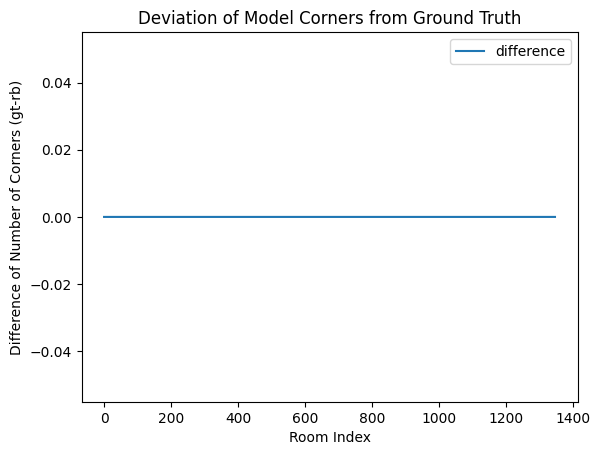

<Figure size 640x480 with 0 Axes>

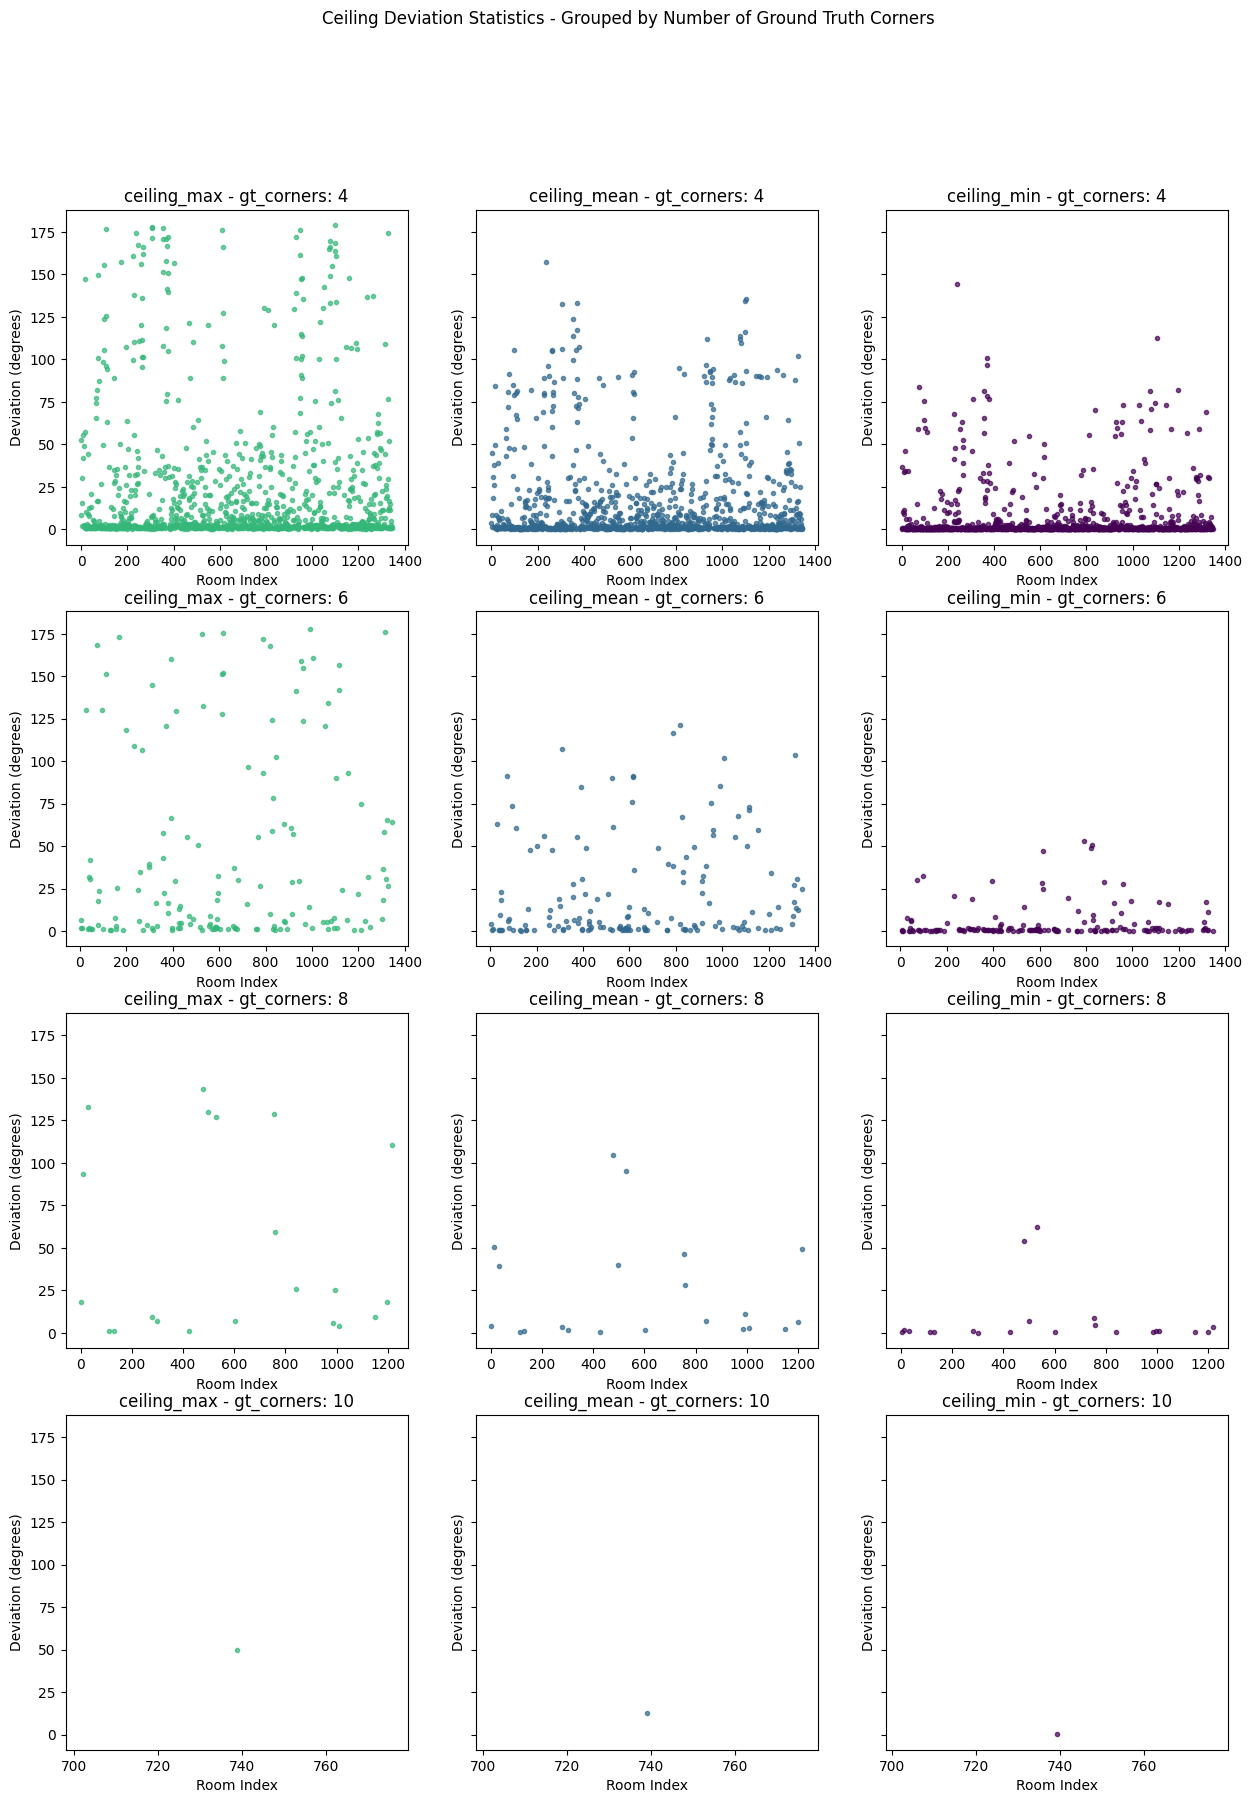

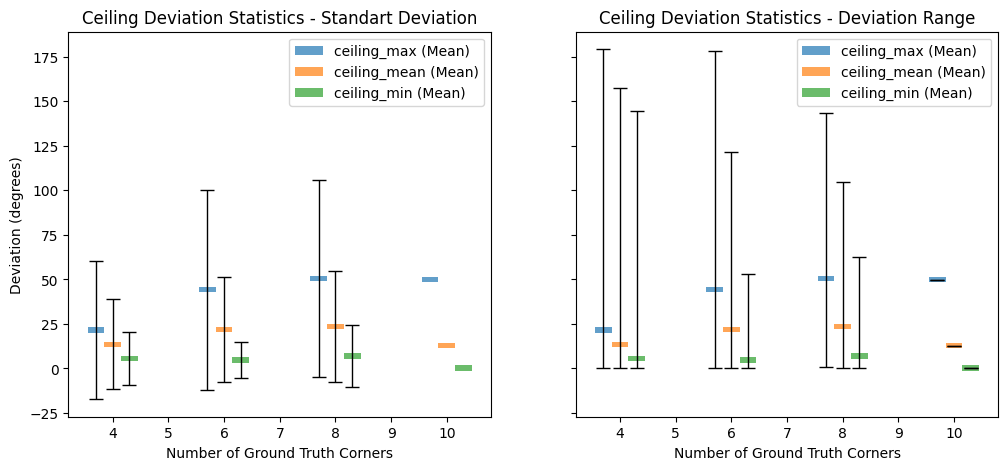

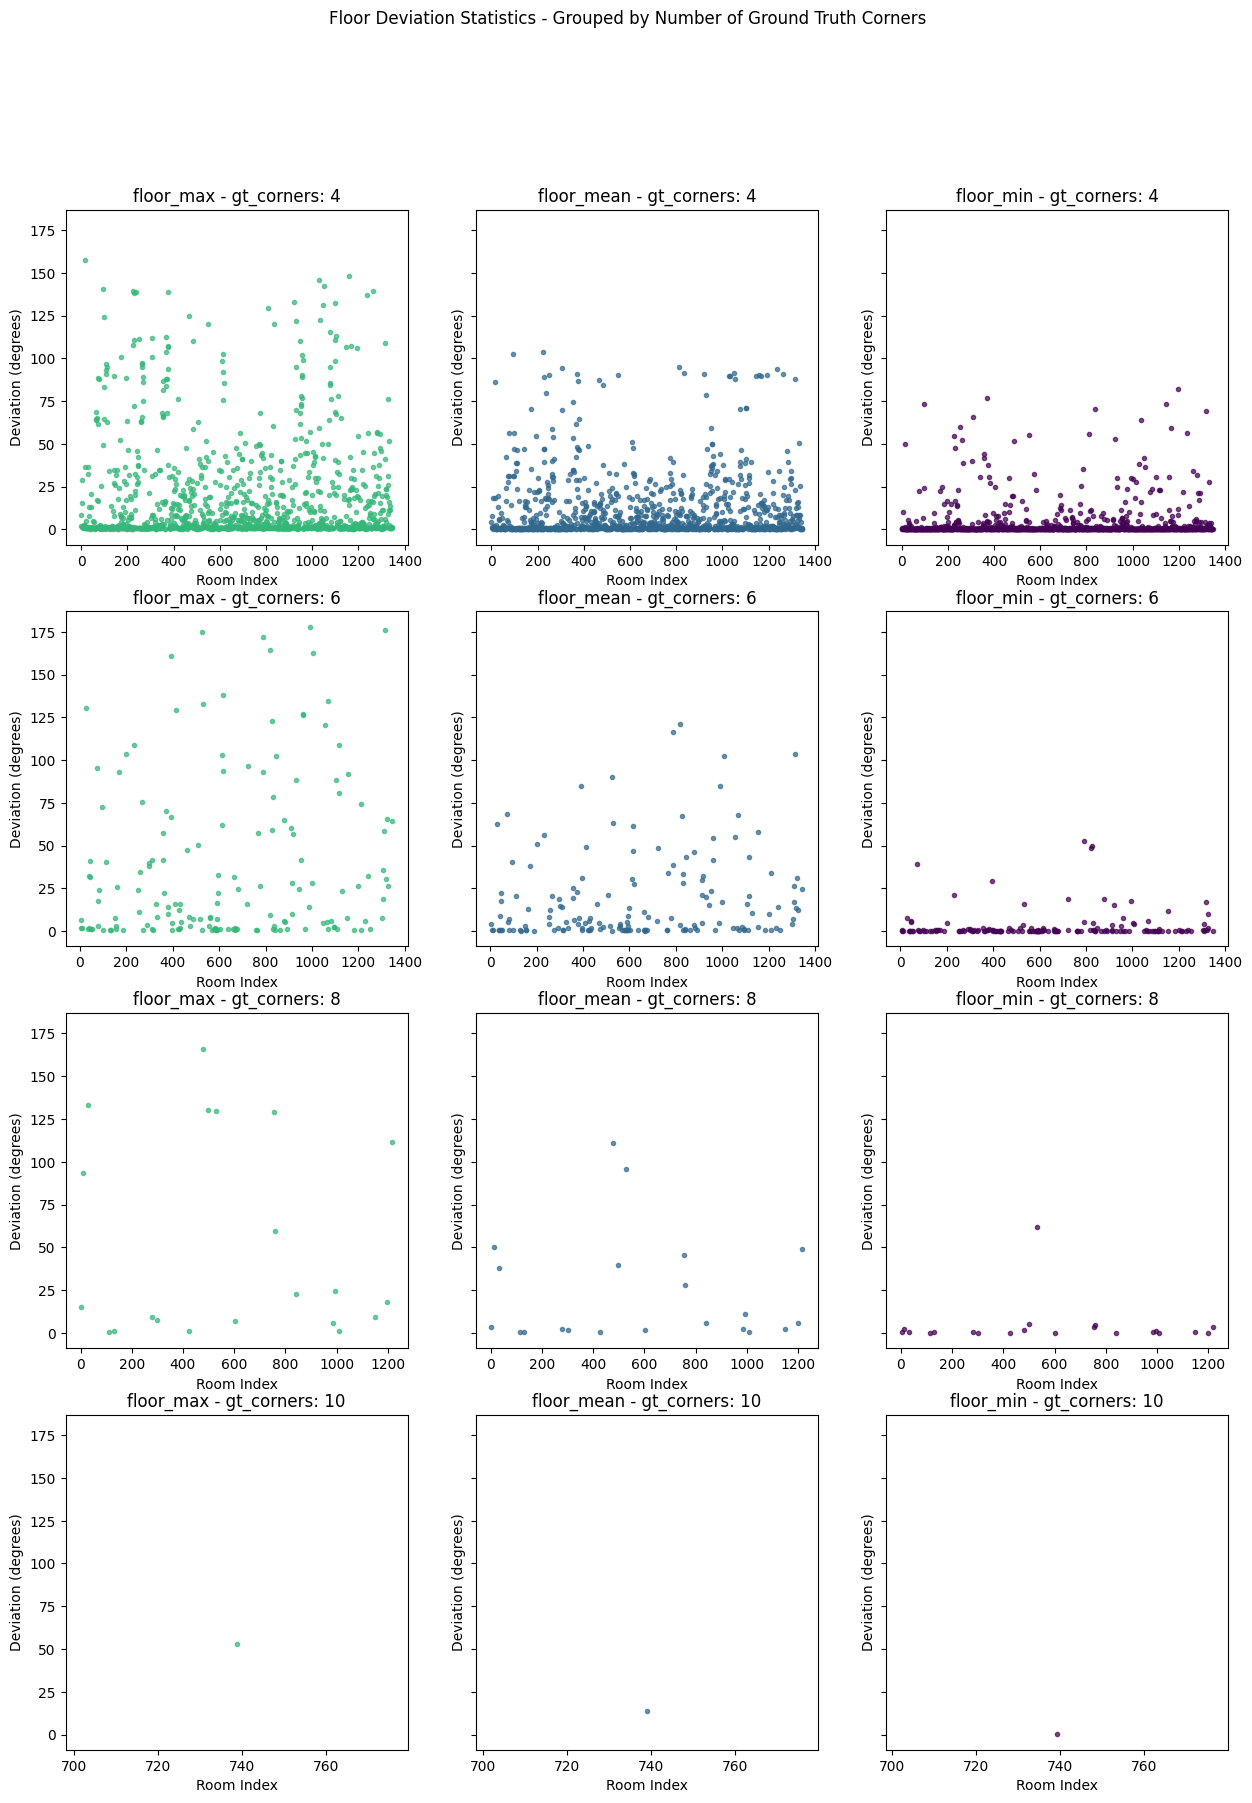

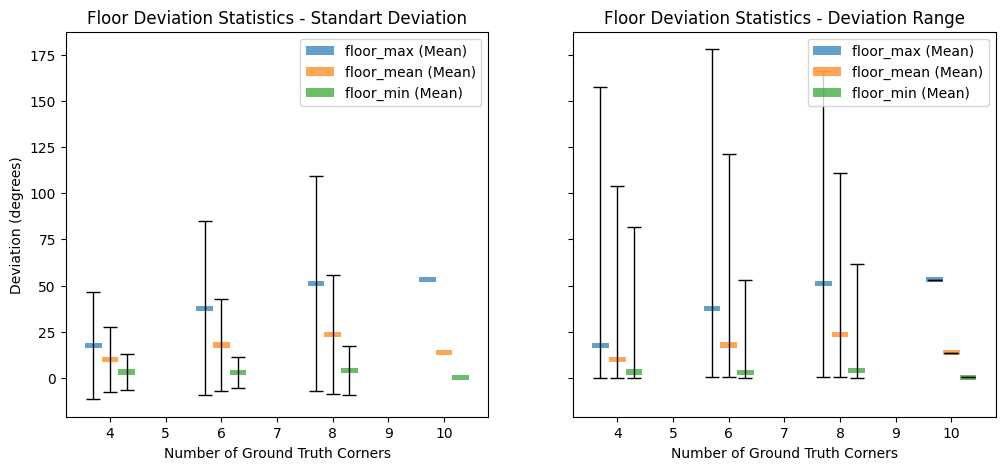

['plots/deviation_corners.png', 'plots/ceiling_deviation_grouped.png', 'plots/ceiling_deviation_overall_trend.png', 'plots/floor_deviation_grouped.png', 'plots/floor_deviation_overall_trend.png']


In [24]:
plot_drawer = PlotDrawer("data.json")
print(plot_drawer.draw_plots())